In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn. metrics import confusion_matrix, ConfusionMatrixDisplay

## Data import

In [2]:
# I have a mac and it keeps giving me error to download the datast. If this brings some problem to you, please remove the part from import ssl to the else: block. Thank you.
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Importing the dataset from the github repository
phishing_dataframe = pd.read_csv('https://raw.githubusercontent.com/PrajwalLuitel/data_mining_datasets/main/phishing_url_dataset.csv')
phishing_dataframe.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


## Data Exploration

In [3]:
print(f"The number of rows in the dataset : {phishing_dataframe.shape[0]} \nThe number of columns in the dataset : {phishing_dataframe.shape[1]}")

The number of rows in the dataset : 235795 
The number of columns in the dataset : 56


In [4]:
phishing_dataframe.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [5]:
phishing_dataframe.dtypes.value_counts()

int64      41
float64    10
object      5
Name: count, dtype: int64

In [6]:
non_numeric_columns = [col for col in phishing_dataframe if phishing_dataframe[f'{col}'].dtype == 'object']
non_numeric_columns

['FILENAME', 'URL', 'Domain', 'TLD', 'Title']

In [7]:
[phishing_dataframe[f'{col}'].nunique() for col in non_numeric_columns]

[235795, 235370, 220086, 695, 197874]

In [8]:
phishing_dataframe.drop(['FILENAME', 'URL', 'Domain', 'Title'], axis=1, inplace=True)

In [9]:
print(f"The number of rows in the dataset : {phishing_dataframe.shape[0]} \nThe number of columns in the dataset : {phishing_dataframe.shape[1]}")

The number of rows in the dataset : 235795 
The number of columns in the dataset : 52


## Data Preprocessing

### Checking for missing values, features type exploration and feature encoding

In [10]:
# Display basic information about the dataset
phishing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   TLD                         235795 non-null  object 
 4   URLSimilarityIndex          235795 non-null  float64
 5   CharContinuationRate        235795 non-null  float64
 6   TLDLegitimateProb           235795 non-null  float64
 7   URLCharProb                 235795 non-null  float64
 8   TLDLength                   235795 non-null  int64  
 9   NoOfSubDomain               235795 non-null  int64  
 10  HasObfuscation              235795 non-null  int64  
 11  NoOfObfuscatedChar          235795 non-null  int64  
 12  ObfuscationRatio            235795 non-null  float64
 13  NoOfLettersInU

In [11]:
# Check for missing values
missing_values = phishing_dataframe.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 URLLength                     0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavicon                    0
Robots                        0
IsResponsive           

In [12]:
for column in phishing_dataframe.columns:
    if phishing_dataframe[column].dtype == 'object':
        le = LabelEncoder()
        phishing_dataframe[column] = le.fit_transform(phishing_dataframe[column])


In [13]:
phishing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   TLD                         235795 non-null  int64  
 4   URLSimilarityIndex          235795 non-null  float64
 5   CharContinuationRate        235795 non-null  float64
 6   TLDLegitimateProb           235795 non-null  float64
 7   URLCharProb                 235795 non-null  float64
 8   TLDLength                   235795 non-null  int64  
 9   NoOfSubDomain               235795 non-null  int64  
 10  HasObfuscation              235795 non-null  int64  
 11  NoOfObfuscatedChar          235795 non-null  int64  
 12  ObfuscationRatio            235795 non-null  float64
 13  NoOfLettersInU

In [14]:
phishing_dataframe.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,231,100.0,1.000000,0.522907,0.061933,3,1,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,254,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,647,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,231,100.0,1.000000,0.522907,0.057606,3,1,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,503,100.0,1.000000,0.079963,0.059441,3,1,...,1,0,1,244,15,34,72,1,85,1


In [15]:
# Checking the correlation heatmap
correlation_matrix = phishing_dataframe.corr()
fig = px.imshow(correlation_matrix, text_auto=True)
fig.update_layout(title='Correlation Heatmap')
fig.show()

#### Outlier detection and removal

In [16]:
from scipy.stats import zscore

numerical_features = phishing_dataframe.select_dtypes(include=['int64', 'float64']).columns

# Calculate z-scores of the numerical columns
z_scores = phishing_dataframe[numerical_features].apply(zscore)

# Set threshold for z-score
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).sum(axis=1) > 0
print(outliers)
# Remove outliers
phishing_dataframe = phishing_dataframe[~outliers]

0         False
1         False
2         False
3          True
4          True
          ...  
235790    False
235791    False
235792    False
235793    False
235794    False
Length: 235795, dtype: bool


## Features Selection

In [17]:
from sklearn.feature_selection import SelectKBest, chi2

# Assuming 'class' is the target variable
X = phishing_dataframe.drop('label', axis=1)
y = phishing_dataframe['label']

# Select top 30 features
selector = SelectKBest(score_func=chi2, k=30)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]

print("Selected Features:\n", selected_features)

# Create a new DataFrame with only the selected features
phishing_dataframe = phishing_dataframe[selected_features.tolist()[20:] + ['label']]


Selected Features:
 Index(['URLLength', 'DomainLength', 'TLD', 'URLSimilarityIndex',
       'NoOfLettersInURL', 'NoOfDegitsInURL', 'NoOfOtherSpecialCharsInURL',
       'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'Pay',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef'],
      dtype='object')


In [18]:
# Checking the correlation heatmap
correlation_matrix = phishing_dataframe.corr()
fig = px.imshow(correlation_matrix, text_auto=True)
fig.update_layout(title='Correlation Heatmap')
fig.show()

## Classification algorithms

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(phishing_dataframe[[col for col in phishing_dataframe if col != 'label']], phishing_dataframe['label'], test_size=0.2, random_state=0)

# Initialize classifiers
dt_classifier = DecisionTreeClassifier( max_depth=2, min_samples_split=2, min_samples_leaf=2)
rf_classifier = RandomForestClassifier(n_estimators=20, max_depth=2, min_samples_split=2, min_samples_leaf=2)


# Fit and evaluate Decision Tree before hyperparameter tuning
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
y_train_pred_dt = dt_classifier.predict(X_train)

print("Training accuracy of decision trees:", accuracy_score(y_train, y_train_pred_dt))
print("Validation accuracy of decision trees:", accuracy_score(y_test, y_pred_dt))

# Fit and evaluate Random Forest before hyperparameter tuning
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
y_train_pred_rf = rf_classifier.predict(X_train)


print("Training accuracy of Random Forest:", accuracy_score(y_train, y_train_pred_rf))
print("Validation accuracy of Random Forest:", accuracy_score(y_test, y_pred_rf))

Training accuracy of decision trees: 0.9777947391482565
Validation accuracy of decision trees: 0.9790812720848057
Training accuracy of Random Forest: 0.9803813481462635
Validation accuracy of Random Forest: 0.9814558303886926


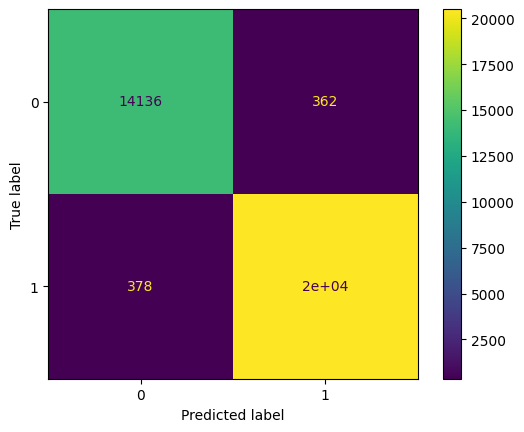

In [20]:


confusion_matrix_dt =  confusion_matrix(y_test, y_pred_dt)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dt, display_labels = [0, 1])

cm_display.plot()
plt.show()

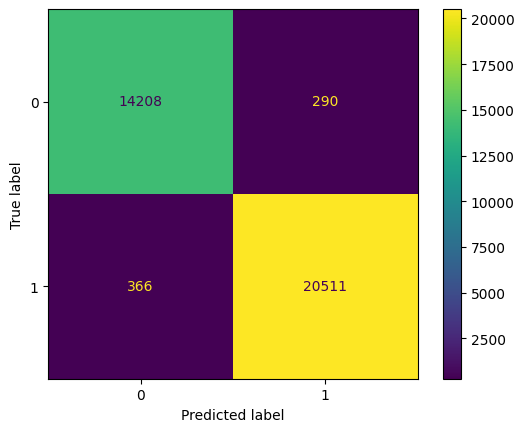

In [21]:
confusion_matrix_rf =  confusion_matrix(y_test, y_pred_rf)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf, display_labels = [0, 1])

cm_display.plot()
plt.show()

## Hyperparameter Tuning

In [22]:
# Hyperparameter tuning for Decision Tree
param_grid_dt = {'max_depth': [3, 5],
                 'min_samples_split': [2, 5],
                 'min_samples_leaf': [1, 2]}
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=3, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_

# Hyperparameter tuning for Random Forest
param_grid_rf = {'n_estimators': [50],
                 'max_depth': [3, 5],
                 'min_samples_split': [2, 5],
                 'min_samples_leaf': [1, 2]}
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf

In [23]:
# Evaluate tuned models
y_pred_dt_tuned = best_dt.predict(X_test)
y_train_pred_dt_tuned = best_dt.predict(X_train)
print("Training Accuracy of decision tree after tuning:", accuracy_score(y_train, y_train_pred_dt_tuned))
print("Validation Accuracy of decision tree after tuning:", accuracy_score(y_test, y_pred_dt_tuned))



y_pred_rf_tuned = best_rf.predict(X_test)
y_train_pred_rf_tuned = best_rf.predict(X_train)
print("Training Accuracy of random forest after tuning:", accuracy_score(y_train, y_train_pred_rf_tuned))
print("Validation Accuracy of random forest after tuning:", accuracy_score(y_test, y_pred_rf_tuned))

Training Accuracy of decision tree after tuning: 0.9868549378789806
Validation Accuracy of decision tree after tuning: 0.9883250883392226
Training Accuracy of random forest after tuning: 0.9877454098291142
Validation Accuracy of random forest after tuning: 0.9880989399293286


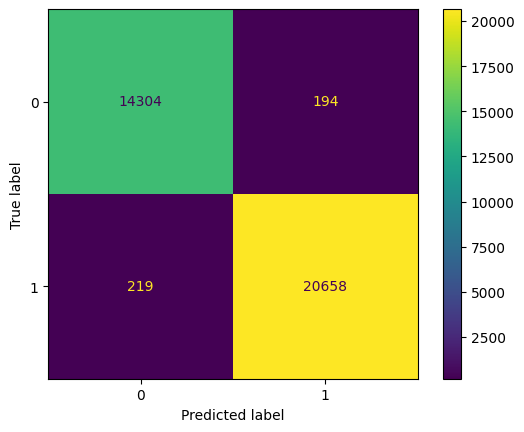

In [24]:
from sklearn. metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix_dt_tuned =  confusion_matrix(y_test, y_pred_dt_tuned)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dt_tuned, display_labels = [0, 1])

cm_display.plot()
plt.show()

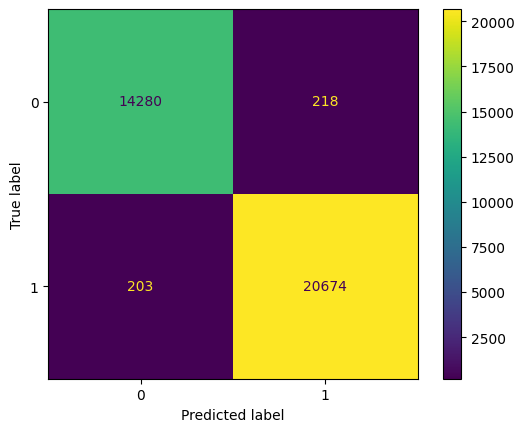

In [25]:
confusion_matrix_rf_tuned =  confusion_matrix(y_test, y_pred_rf_tuned)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf_tuned, display_labels = [0, 1])

cm_display.plot()
plt.show()